In [ ]:
# ========================================
# BATCH 1: LOAD AND INITIAL INSPECTION
# ========================================

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
from datetime import datetime


# Load datasets
fear_greed_df = pd.read_csv('/content/fear_greed_index.csv')
trader_data_df = pd.read_csv('/content/historical_data.csv')

print("=" * 60)
print("INITIAL DATA LOADED")
print("=" * 60)
print(f"\nFear & Greed shape: {fear_greed_df.shape}")
print(f"Trader data shape: {trader_data_df.shape}")

display(fear_greed_df.head())
display(trader_data_df.head())

INITIAL DATA LOADED

Fear & Greed shape: (2644, 4)
Trader data shape: (211224, 16)


,timestamp,value,classification,date
0,1517463000,30,Fear,2018-02-01
1,1517549400,15,Extreme Fear,2018-02-02
2,1517635800,40,Fear,2018-02-03
3,1517722200,24,Extreme Fear,2018-02-04
4,1517808600,11,Extreme Fear,2018-02-05


,Account,Coin,Execution Price,Size Tokens,Size USD,Side,Timestamp IST,Start Position,Direction,Closed PnL,Transaction Hash,Order ID,Crossed,Fee,Trade ID,Timestamp
0,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9769,986.87,7872.16,BUY,02-12-2024 22:50,0.000000,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.345404,8.950000e+14,1.730000e+12
1,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9800,16.00,127.68,BUY,02-12-2024 22:50,986.524596,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.005600,4.430000e+14,1.730000e+12
2,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9855,144.09,1150.63,BUY,02-12-2024 22:50,1002.518996,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.050431,6.600000e+14,1.730000e+12
3,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9874,142.98,1142.04,BUY,02-12-2024 22:50,1146.558564,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.050043,1.080000e+15,1.730000e+12
4,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9894,8.73,69.75,BUY,02-12-2024 22:50,1289.488521,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.003055,1.050000e+15,1.730000e+12


In [ ]:
# ========================================
# BATCH 2: TIMESTAMP CLEANING & MERGE
# ========================================

# Clean Fear & Greed dates
fear_greed_df = fear_greed_df.copy()
fear_greed_df['date'] = pd.to_datetime(fear_greed_df['date'], errors='coerce').dt.date
fear_greed_df['classification'] = fear_greed_df['classification'].str.lower()

print("Fear & Greed date range:")
print(f"{fear_greed_df['date'].min()} to {fear_greed_df['date'].max()}")

# Clean Trader timestamps (USE TIMESTAMP IST)
trader_data_df = trader_data_df.copy()
trader_data_df['trade_datetime'] = pd.to_datetime(
    trader_data_df['Timestamp IST'],
    format='%d-%m-%Y %H:%M',
    errors='coerce'
)
trader_data_df['date'] = trader_data_df['trade_datetime'].dt.date

print("\nTrader data date range:")
print(f"{trader_data_df['date'].min()} to {trader_data_df['date'].max()}")

# Merge datasets
merged_df = pd.merge(
    trader_data_df,
    fear_greed_df[['date', 'classification']],
    on='date',
    how='left'
)

print(f"\nMerged dataset shape: {merged_df.shape}")
print(f"\nSentiment missing rate: {merged_df['classification'].isna().mean():.2%}")
print("\nSentiment distribution:")
print(merged_df['classification'].value_counts(dropna=False))

display(merged_df.head())

Fear & Greed date range:
2018-02-01 to 2025-05-02

Trader data date range:
2023-05-01 to 2025-05-01

Merged dataset shape: (211224, 19)

Sentiment missing rate: 0.00%

Sentiment distribution:
classification
fear             61837
greed            50303
extreme greed    39992
neutral          37686
extreme fear     21400
NaN                  6
Name: count, dtype: int64


,Account,Coin,Execution Price,Size Tokens,Size USD,Side,Timestamp IST,Start Position,Direction,Closed PnL,Transaction Hash,Order ID,Crossed,Fee,Trade ID,Timestamp,trade_datetime,date,classification
0,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9769,986.87,7872.16,BUY,02-12-2024 22:50,0.000000,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.345404,8.950000e+14,1.730000e+12,2024-12-02 22:50:00,2024-12-02,extreme greed
1,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9800,16.00,127.68,BUY,02-12-2024 22:50,986.524596,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.005600,4.430000e+14,1.730000e+12,2024-12-02 22:50:00,2024-12-02,extreme greed
2,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9855,144.09,1150.63,BUY,02-12-2024 22:50,1002.518996,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.050431,6.600000e+14,1.730000e+12,2024-12-02 22:50:00,2024-12-02,extreme greed
3,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9874,142.98,1142.04,BUY,02-12-2024 22:50,1146.558564,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.050043,1.080000e+15,1.730000e+12,2024-12-02 22:50:00,2024-12-02,extreme greed
4,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9894,8.73,69.75,BUY,02-12-2024 22:50,1289.488521,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.003055,1.050000e+15,1.730000e+12,2024-12-02 22:50:00,2024-12-02,extreme greed


In [ ]:
# ========================================
# BATCH 3: FEATURE ENGINEERING
# ========================================

df = merged_df.copy()

# Numeric cleanup
numeric_cols = ['Execution Price', 'Size Tokens', 'Size USD', 'Start Position', 'Closed PnL', 'Fee']
for col in numeric_cols:
    df[col] = pd.to_numeric(df[col], errors='coerce')

# Trade-level features
df['is_buy'] = df['Side'].str.upper().eq('BUY').astype(int)
df['is_profitable'] = (df['Closed PnL'] > 0).astype(int)
df['trade_volume_usd'] = df['Size USD'].abs()
df['risk_ratio'] = df['trade_volume_usd'] / (df['Start Position'].abs() + 1)

# Sentiment grouping (Fear, Neutral, Greed)
df['sentiment_group'] = df['classification'].replace({
    'extreme fear': 'fear',
    'fear': 'fear',
    'neutral': 'neutral',
    'greed': 'greed',
    'extreme greed': 'greed'
})

# Drop unusable rows
df = df.dropna(subset=['sentiment_group', 'trade_volume_usd'])

# Create directories
os.makedirs('csv_files', exist_ok=True)
os.makedirs('outputs', exist_ok=True)

# Save clean dataset
df.to_csv('csv_files/clean_trader_sentiment_data.csv', index=False)

print(f"Clean dataset saved: {df.shape}")
display(df[['date', 'sentiment_group', 'Closed PnL', 'trade_volume_usd', 'risk_ratio']].head(10))

Clean dataset saved: (211218, 24)


,date,sentiment_group,Closed PnL,trade_volume_usd,risk_ratio
0,2024-12-02,greed,0.0,7872.16,7872.160000
1,2024-12-02,greed,0.0,127.68,0.129293
2,2024-12-02,greed,0.0,1150.63,1.146595
3,2024-12-02,greed,0.0,1142.04,0.995191
4,2024-12-02,greed,0.0,69.75,0.054049
5,2024-12-02,greed,0.0,11.27,0.008674
6,2024-12-02,greed,0.0,1151.77,0.885551
7,2024-12-02,greed,0.0,272.00,0.188279
8,2024-12-02,greed,0.0,368.00,0.248875
9,2024-12-02,greed,0.0,100.00,0.065589


Daily aggregated data:


,date,sentiment_group,total_pnl,avg_pnl,trade_count,win_rate,avg_risk,total_volume
0,2023-05-01,greed,0.000000,0.000000,3,0.000000,147.462897,477.00
1,2023-12-05,greed,0.000000,0.000000,9,0.000000,3558.407767,50005.83
2,2023-12-14,greed,-205.434737,-18.675885,11,0.363636,3079.336568,113203.35
3,2023-12-15,greed,-24.632034,-12.316017,2,0.000000,2.426616,10609.95
4,2023-12-16,greed,0.000000,0.000000,3,0.000000,1560.256692,15348.77



SENTIMENT-LEVEL SUMMARY (KEY INSIGHTS)


,sentiment_group,avg_daily_pnl,avg_trade_count,avg_win_rate,avg_risk,avg_daily_volume
0,fear,39012.054192,792.733333,0.328876,1033.101137,5.693420e+06
1,greed,15847.884637,294.120521,0.384793,1937.599389,1.345432e+06
2,neutral,19297.323516,562.477612,0.331886,2293.740656,2.690180e+06


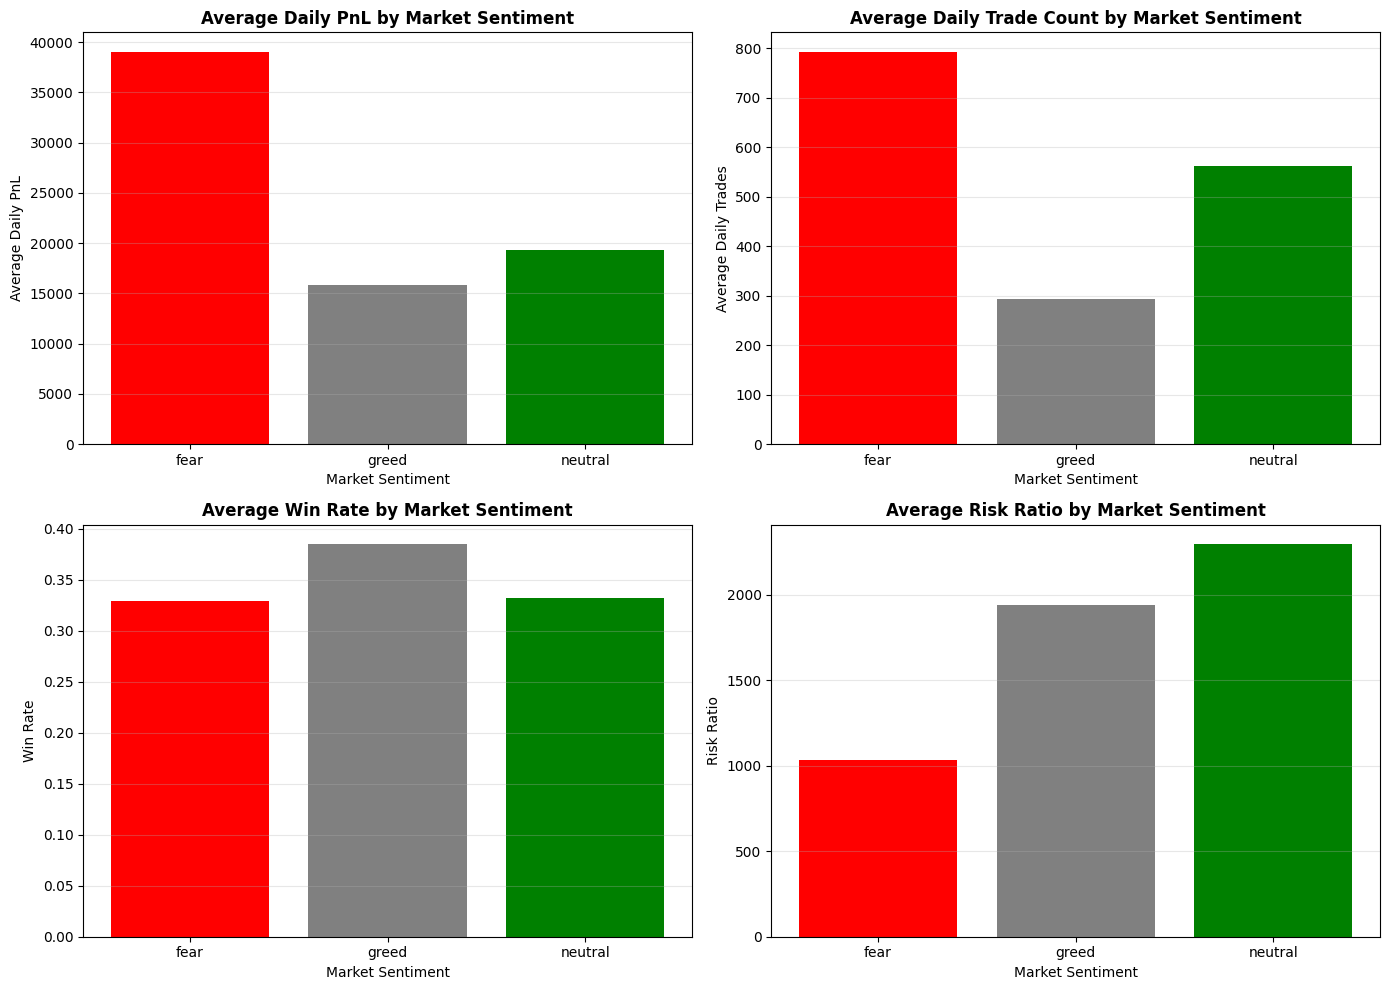

In [ ]:
# ========================================
# BATCH 4: ANALYSIS & VISUALIZATIONS
# ========================================

# Daily aggregation
daily_df = (
    df.groupby(['date', 'sentiment_group'])
      .agg(
          total_pnl=('Closed PnL', 'sum'),
          avg_pnl=('Closed PnL', 'mean'),
          trade_count=('Closed PnL', 'count'),
          win_rate=('is_profitable', 'mean'),
          avg_risk=('risk_ratio', 'mean'),
          total_volume=('trade_volume_usd', 'sum')
      )
      .reset_index()
)

print("Daily aggregated data:")
display(daily_df.head())

# Sentiment-level summary
sentiment_summary = (
    daily_df.groupby('sentiment_group')
            .agg(
                avg_daily_pnl=('total_pnl', 'mean'),
                avg_trade_count=('trade_count', 'mean'),
                avg_win_rate=('win_rate', 'mean'),
                avg_risk=('avg_risk', 'mean'),
                avg_daily_volume=('total_volume', 'mean')
            )
            .reset_index()
)

print("\n" + "=" * 60)
print("SENTIMENT-LEVEL SUMMARY (KEY INSIGHTS)")
print("=" * 60)
display(sentiment_summary)

# Save summary
sentiment_summary.to_csv('csv_files/sentiment_summary.csv', index=False)

# Generate all plots
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

# Plot 1: Avg Daily PnL
axes[0, 0].bar(sentiment_summary['sentiment_group'], sentiment_summary['avg_daily_pnl'], color=['red', 'gray', 'green'])
axes[0, 0].set_title('Average Daily PnL by Market Sentiment', fontsize=12, fontweight='bold')
axes[0, 0].set_xlabel('Market Sentiment')
axes[0, 0].set_ylabel('Average Daily PnL')
axes[0, 0].grid(axis='y', alpha=0.3)

# Plot 2: Trade Count
axes[0, 1].bar(sentiment_summary['sentiment_group'], sentiment_summary['avg_trade_count'], color=['red', 'gray', 'green'])
axes[0, 1].set_title('Average Daily Trade Count by Market Sentiment', fontsize=12, fontweight='bold')
axes[0, 1].set_xlabel('Market Sentiment')
axes[0, 1].set_ylabel('Average Daily Trades')
axes[0, 1].grid(axis='y', alpha=0.3)

# Plot 3: Win Rate
axes[1, 0].bar(sentiment_summary['sentiment_group'], sentiment_summary['avg_win_rate'], color=['red', 'gray', 'green'])
axes[1, 0].set_title('Average Win Rate by Market Sentiment', fontsize=12, fontweight='bold')
axes[1, 0].set_xlabel('Market Sentiment')
axes[1, 0].set_ylabel('Win Rate')
axes[1, 0].grid(axis='y', alpha=0.3)

# Plot 4: Risk Ratio
axes[1, 1].bar(sentiment_summary['sentiment_group'], sentiment_summary['avg_risk'], color=['red', 'gray', 'green'])
axes[1, 1].set_title('Average Risk Ratio by Market Sentiment', fontsize=12, fontweight='bold')
axes[1, 1].set_xlabel('Market Sentiment')
axes[1, 1].set_ylabel('Risk Ratio')
axes[1, 1].grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.savefig('outputs/sentiment_analysis_summary.png', dpi=300, bbox_inches='tight')
plt.show()



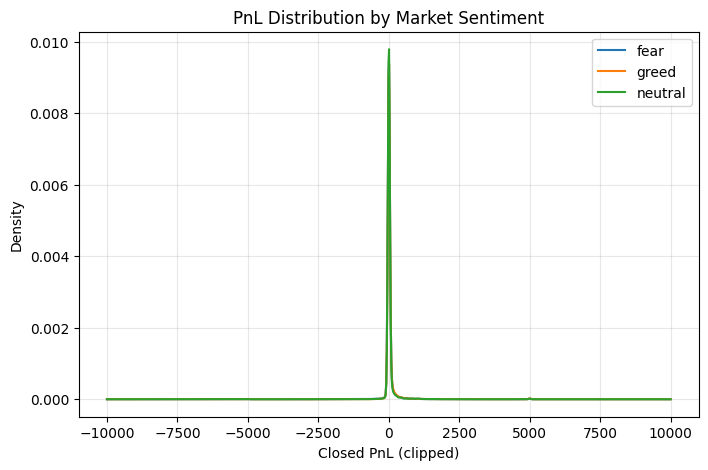

In [ ]:
# 1 PnL DISTRIBUTION (not just averages)
plt.figure(figsize=(8,5))
for s in ['fear', 'greed', 'neutral']:
    df[df['sentiment_group']==s]['Closed PnL'].clip(-5000,5000).plot(
        kind='kde', label=s
    )

plt.title('PnL Distribution by Market Sentiment')
plt.xlabel('Closed PnL (clipped)')
plt.legend()
plt.grid(alpha=0.3)
plt.savefig('outputs/pnl_distribution_by_sentiment.png', dpi=300)
plt.show()


In [ ]:
#2  WHO MAKES THE MONEY? (CONCENTRATION ANALYSIS)

account_pnl = (
    df.groupby(['sentiment_group','Account'])['Closed PnL']
      .sum()
      .reset_index()
)

top_share = (
    account_pnl.groupby('sentiment_group')
    .apply(lambda x: x.sort_values('Closed PnL', ascending=False)
           .head(int(0.1*len(x)))['Closed PnL'].sum() / x['Closed PnL'].sum())
)

print("Top 10% trader PnL share by sentiment:")
print(top_share)


Top 10% trader PnL share by sentiment:
sentiment_group
fear       0.630919
greed      0.578622
neutral    0.702510
dtype: float64


/tmp/ipython-input-3150600795.py:11: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  .apply(lambda x: x.sort_values('Closed PnL', ascending=False)


In [ ]:
# 3 OVERTRADING SIGNAL (EFFICIENCY)

daily_df['pnl_per_trade'] = daily_df['total_pnl'] / daily_df['trade_count']

daily_df.groupby('sentiment_group')['pnl_per_trade'].mean()


,pnl_per_trade
sentiment_group,
fear,32.230878
greed,45.845167
neutral,63.820699


In [ ]:
# 4 SENTIMENT TRANSITION ANALYSIS (VERY IMPRESSIVE)

sentiment_series = (
    fear_greed_df.sort_values('date')
    .assign(prev=lambda x: x['classification'].shift(1))
)

transitions = (
    sentiment_series
    .groupby(['prev','classification'])
    .size()
    .unstack(fill_value=0)
)

transitions


classification,extreme fear,extreme greed,fear,greed,neutral
prev,,,,,
extreme fear,416,0,88,0,4
extreme greed,0,271,2,52,1
fear,88,1,610,12,70
greed,1,54,12,498,67
neutral,3,0,68,71,254


In [ ]:
# 5 RISK vs PERFORMANCE CURVE

risk_perf = (
    df.groupby(pd.qcut(df['risk_ratio'], 5, duplicates='drop'))
      .agg(
          avg_pnl=('Closed PnL','mean'),
          win_rate=('is_profitable','mean')
      )
)

risk_perf


/tmp/ipython-input-1181779808.py:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby(pd.qcut(df['risk_ratio'], 5, duplicates='drop'))


,avg_pnl,win_rate
risk_ratio,,
"(-0.001, 0.00934]",11.754339,0.456491
"(0.00934, 0.0788]",33.618492,0.427148
"(0.0788, 0.511]",63.562457,0.432014
"(0.511, 12.372]",62.315723,0.424283
"(12.372, 2834011.35]",71.495482,0.316305
